In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows',500)

In [2]:
pd_raw=pd.read_csv('C:/Users/asus/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,82,86,86,91,91,91,91,91,92,92
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,162526,167416,173355,178996,185373,191302,196543,201919,206743,213535
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,37317,37390,37629,37937,38196,38550,38841,39050,39102,39298
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3685,3699,3718,3736,3756,3773,3784,3797,3809,3820


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot=pd.DataFrame({
    'date':time_idx})

In [6]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:4,::].sum(axis=0)[4:8]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: object

In [9]:
country_list=['Italy',
             'US',
             'Spain',
             'Germany',
             'Korea, South',
             'India']

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

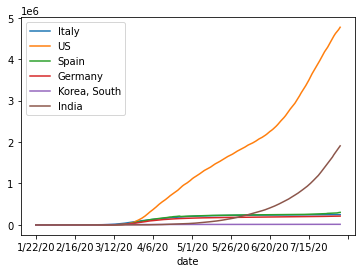

In [11]:
df_plot.set_index('date').plot()

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,1/22/20,0,1,0,0,1,0
1,1/23/20,0,1,0,0,1,0
2,1/24/20,0,2,0,0,2,0
3,1/25/20,0,2,0,0,2,0
4,1/26/20,0,5,0,0,3,0


In [13]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0


In [16]:
df_plot.to_csv('C:/Users/asus/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=':',index=False)

In [17]:
data_path='C:/Users/asus/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [18]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [19]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)

In [20]:
pd_data_base.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782
1,no,Albania,0,0,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750
2,no,Algeria,0,0,0,0,0,0,0,0,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504
3,no,Andorra,0,0,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939
4,no,Angola,0,0,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country'])\
                            .T                            \
                            .stack(level=[0,1])           \
                            .reset_index()                \
                            .rename(columns={'level_0':'date',
                                                0:'confirmed'})

In [22]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)
pd_relational_model.to_csv('C:/Users/asus/ads_covid-19/data/processed/COVID_relational_confirmed.csv',sep=':',index=False)

In [27]:
relational=pd.read_csv('C:/Users/asus/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=':')

In [28]:
relational.head()

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0


In [29]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
51058 2020-07-31    no      US    4562107
51324 2020-08-01    no      US    4620592
51590 2020-08-02    no      US    4668172
51856 2020-08-03    no      US    4713540
52122 2020-08-04    no      US    4771080


In [30]:
data_path='C:/Users/asus/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,337,349,351,354,356,356,356,368,375,389
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,40,40,40,42,42,42,44,45,46,46
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,...,77,77,77,77,78,82,85,85,86,89
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,...,91,92,95,96,97,99,101,104,108,109


In [31]:
pd_raw_US.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '7/26/20', '7/27/20', '7/28/20', '7/29/20', '7/30/20', '7/31/20',
       '8/1/20', '8/2/20', '8/3/20', '8/4/20'],
      dtype='object', length=207)

In [32]:
pd_raw_US=pd_raw_US.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Lat','Long_','Country_Region','Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [33]:
pd_data_base_US

,state,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,337,349,351,354,356,356,356,368,375,389
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,40,40,40,42,42,42,44,45,46,46
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,77,77,77,77,78,82,85,85,86,89
4,Puerto Rico,0,0,0,0,0,0,0,0,0,...,91,92,95,96,97,99,101,104,108,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Utah,0,0,0,0,0,0,0,0,0,...,341,347,353,357,363,369,376,381,388,396
3336,Utah,0,0,0,0,0,0,0,0,0,...,70,70,71,79,82,83,87,88,89,96
3337,Utah,0,0,0,0,0,0,0,0,0,...,2750,2781,2814,2827,2855,2901,2940,2983,3013,3049
3338,Utah,0,0,0,0,0,0,0,0,0,...,137,142,144,146,151,153,162,164,167,169


In [34]:
pd_relational_model_US=pd_data_base_US.set_index(['state'])\
                            .T                            \
                            .stack()           \
                            .reset_index()                \
                            .rename(columns={'level_0':'date',
                                                0:'confirmed'})
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date]
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,American Samoa,0,US
1,2020-01-22,Guam,0,US
2,2020-01-22,Northern Mariana Islands,0,US
3,2020-01-22,Puerto Rico,0,US
4,2020-01-22,Puerto Rico,0,US


In [35]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [36]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [37]:
pd_relational_model_all.to_csv('C:/Users/asus/ads_covid-19/data/processed/20200420_COVID_reational_confirmed.csv',sep=':',index=False)

In [38]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date                     state country  confirmed
51940  2020-01-22            American Samoa      US          0
51941  2020-01-22                      Guam      US          0
51942  2020-01-22  Northern Mariana Islands      US          0
51943  2020-01-22               Puerto Rico      US          0
51944  2020-01-22               Puerto Rico      US          0
...           ...                       ...     ...        ...
706575 2020-08-04                      Utah      US        396
706576 2020-08-04                      Utah      US         96
706577 2020-08-04                      Utah      US       3049
706578 2020-08-04                      Utah      US        169
706579 2020-08-04                      Utah      US       2660

[654640 rows x 4 columns]


In [39]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [40]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
